In [1]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
x_train = pd.read_csv("adult_train2.csv")
x_test = pd.read_csv("adult_test2.csv")

# 刪除特徵前

In [4]:
#訓練資料正規化
scaler = StandardScaler()
y_train_class = x_train['hours-per-week'].values
x_train_attribute = x_train.drop(labels=['hours-per-week'],axis=1)
x_train_attribute_2 = x_train_attribute.values
scaler = scaler.fit(x_train_attribute.values)
x_train_attribute_final = scaler.transform(x_train_attribute.values)

In [5]:
#測試資料正規化
scaler = StandardScaler()
y_test_class = x_test['hours-per-week'].values
x_test_attribute = x_test.drop(labels=['hours-per-week'],axis=1)
x_test_attribute_2 = x_test_attribute.values
scaler = scaler.fit(x_test_attribute.values)
x_test_attribute_final = scaler.transform(x_test_attribute.values)

In [19]:
#使用訓練資料做預測
list = []
list2 =[]
list3 =[]
k = 1
while k <= 61:
    k = k+2
    clf = KNeighborsClassifier(n_neighbors=k,weights = 'distance',algorithm = 'auto')
    clf.fit(x_train_attribute_final,y_train_class)
    y_pred = clf.predict(x_test_attribute_final)
    list.append(mean_absolute_error(y_test_class,y_pred))
    list2.append(mean_absolute_percentage_error(y_test_class,y_pred))
    list3.append(mean_squared_error(y_test_class, y_pred,squared=False))

Feature: 0, Score: 126.2995
Feature: 1, Score: 68.6172
Feature: 2, Score: 115.7544
Feature: 3, Score: 102.1375
Feature: 4, Score: 102.1423
Feature: 5, Score: 84.4265
Feature: 6, Score: 115.1054
Feature: 7, Score: 96.0715
Feature: 8, Score: 31.8896
Feature: 9, Score: 58.7365
Feature: 10, Score: 19.6617
Feature: 11, Score: 13.1469
Feature: 12, Score: 21.4578
Feature: 13, Score: 52.5718


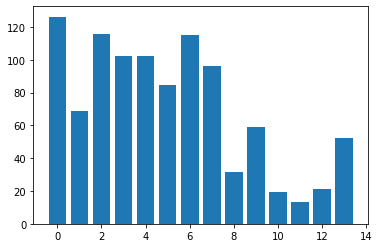

In [9]:
from sklearn.inspection import permutation_importance
list_knnimportance = []
results = permutation_importance(clf, x_train_attribute_final,y_train_class, scoring='neg_mean_squared_error')
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.4f' % (i,v))
    list_knnimportance.append(v)

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [10]:
print("置換特徵最大值:",'%.4f'%max(list_knnimportance),",特徵名稱為",x_test_attribute.columns[list_knnimportance.index(max(list_knnimportance))])
print("置換特徵最小值:",'%.4f'%min(list_knnimportance),",特徵名稱為",x_test_attribute.columns[list_knnimportance.index(min(list_knnimportance))])


置換特徵最大值: 126.2995 ,特徵名稱為 age
置換特徵最小值: 13.1469 ,特徵名稱為 capital-loss


In [11]:
x_test_attribute

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,Class
0,25,2,226802,1,7,4,6,3,2,1,0,0,37,2
1,38,2,89814,11,9,2,4,0,4,1,0,0,37,2
2,28,1,336951,7,12,2,10,0,4,1,0,0,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,37,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,245211,9,13,4,9,3,4,1,0,0,37,2
15056,39,2,215419,9,13,0,9,1,4,0,0,0,37,2
15057,38,2,374983,9,13,2,9,0,4,1,0,0,37,2
15058,44,2,83891,9,13,0,0,3,1,1,5455,0,37,2


In [31]:
print('MAE:',list,'\n','Min:',min(list),' 鄰居數為',list.index(min(list))*2+1,'個','\n')
print('MAPE: ',list2,'\n','Min:',min(list2),' 鄰居數為',list.index(min(list))*2+1,'個','\n')
print('RMSE: ',list3,'\n','Min:',min(list3),' 鄰居數為',list.index(min(list))*2+1,'個','\n')

MAE: [8.966201859229749, 8.09136786188579, 7.679482071713148, 7.40796812749004, 7.303917662682603, 7.16726427622842, 7.061221779548473, 6.976162018592298, 6.961487383798141, 6.918525896414343, 6.891102257636122, 6.884528552456839, 6.8649402390438246, 6.8560424966799465, 6.844887118193891, 6.8403718459495355, 6.829083665338645, 6.819721115537849, 6.808764940239044, 6.81547144754316, 6.802390438247012, 6.801261620185923, 6.810424966799469, 6.80796812749004, 6.804116865869854, 6.805776892430279, 6.812151394422311, 6.818924302788845, 6.818990703851262, 6.8069057104913675, 6.812151394422311] 
 Min: 6.801261620185923  鄰居數為 43 個 

MAPE:  [0.33826273268284673, 0.3158664589362973, 0.3095289333617164, 0.30228317369465685, 0.2996225156386599, 0.2959660594684964, 0.29371089066347045, 0.29164289227843415, 0.29244422421674143, 0.29352288814086186, 0.2932049494025992, 0.2928761837601791, 0.2920008637497739, 0.29256042638000895, 0.29105749587737545, 0.29272043418830107, 0.29175951601464634, 0.29109531

# 刪除重要特徵

In [13]:
x_train_attribute2 = x_train.drop(labels=['hours-per-week','fnlwgt','age','occupation'],axis=1)
y_train_class2 = x_train['hours-per-week'].values

x_test_attribute2 = x_test.drop(labels=['hours-per-week','fnlwgt','age','occupation'],axis=1)
y_test_class2 = x_test['hours-per-week'].values

In [34]:
clf = KNeighborsClassifier(n_neighbors=43,weights = 'distance',algorithm = 'auto')
clf.fit(x_train_attribute2,y_train_class2)
y_pred001 = clf.predict(x_test_attribute2)
print('MAE:',mean_absolute_error(y_test_class2,y_pred001))
print('MAPE: ',mean_absolute_percentage_error(y_test_class2,y_pred001))
print('RMSE: ',mean_squared_error(y_test_class2, y_pred001,squared=False))
 

MAE: 7.074900398406374
MAPE:  0.30437229630079476
RMSE:  11.765385790055701


# 刪除不重要特徵

In [26]:
x_train_attribute3 = x_train.drop(labels=['hours-per-week','capital-gain','capital-loss','native-country'],axis=1)
y_train_class3 = x_train['hours-per-week'].values

x_test_attribute3 = x_test.drop(labels=['hours-per-week','capital-gain','capital-loss','native-country'],axis=1)
y_test_class3 = x_test['hours-per-week'].values

In [35]:
clf = KNeighborsClassifier(n_neighbors=43,weights = 'distance',algorithm = 'auto')
clf.fit(x_train_attribute3,y_train_class3)
y_pred002 = clf.predict(x_test_attribute3)
print('MAE:',mean_absolute_error(y_test_class3,y_pred002))
print('MAPE: ',mean_absolute_percentage_error(y_test_class3,y_pred002))
print('RMSE: ',mean_squared_error(y_test_class3, y_pred002,squared=False))

MAE: 7.485856573705179
MAPE:  0.32448101271087954
RMSE:  12.24066709550158


In [38]:
comparison = {
    'NAME':['原始資料預測','刪除特徵最大','刪除特徵最小'],
    'MAE':[min(list),mean_absolute_error(y_test_class2,y_pred001),mean_absolute_error(y_test_class3,y_pred002)],
    'MAPE':[min(list2),mean_absolute_percentage_error(y_test_class2,y_pred001),mean_absolute_percentage_error(y_test_class3,y_pred002)],
    'RMSE':[min(list3),mean_squared_error(y_test_class2, y_pred001,squared=False),mean_squared_error(y_test_class3, y_pred002,squared=False)]
}
df001 = pd.DataFrame(comparison)

In [39]:
df001

,NAME,MAE,MAPE,RMSE
0,原始資料預測,6.801262,0.290072,11.424099
1,刪除特徵最大,7.074900,0.304372,11.765386
2,刪除特徵最小,7.485857,0.324481,12.240667
